## Qn1 a) The plots

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def get_cartesian(r, theta, vr, vtheta):
    """Return cartesian coordinates and velocities."""
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    # Convert velocities
    vx = np.cos(theta) * vr - np.sin(theta) * vtheta
    vy = np.sin(theta) * vr + np.cos(theta) * vtheta
    
    return x, y, vx, vy


In [3]:
def get_theta(r, a, b, theta0=0.):
    """Return theta values based on given streamline equation."""
    return (a/b) * np.log(r) + theta0

In [4]:
a_vals = [10., 5., 2.]
b_vals = [1., 1., 1.]
r = np.linspace(0.01, 100, 1000)
inds = np.arange(30, 990, 30)

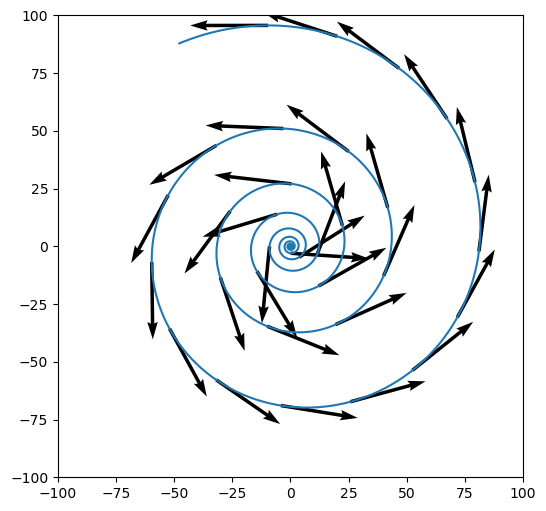

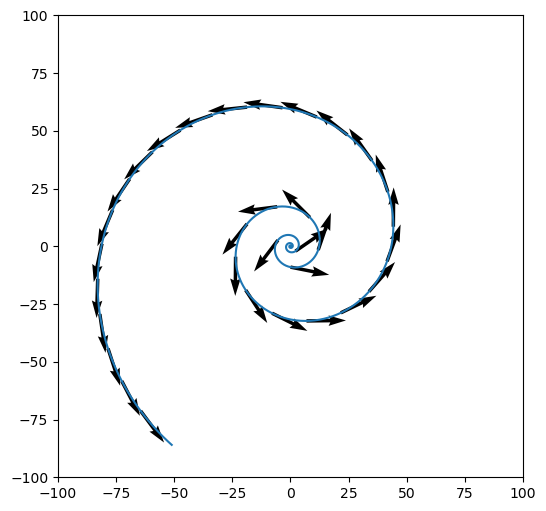

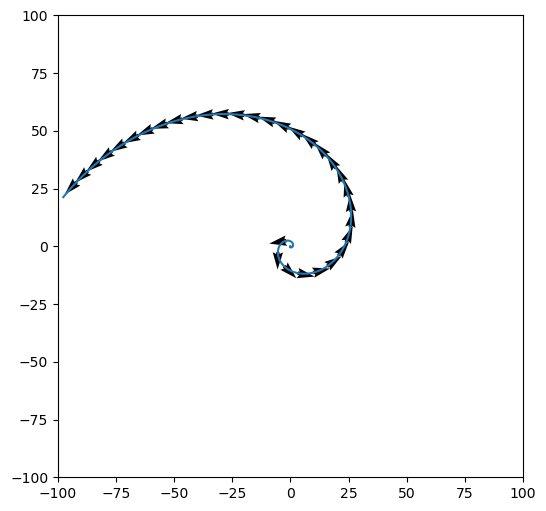

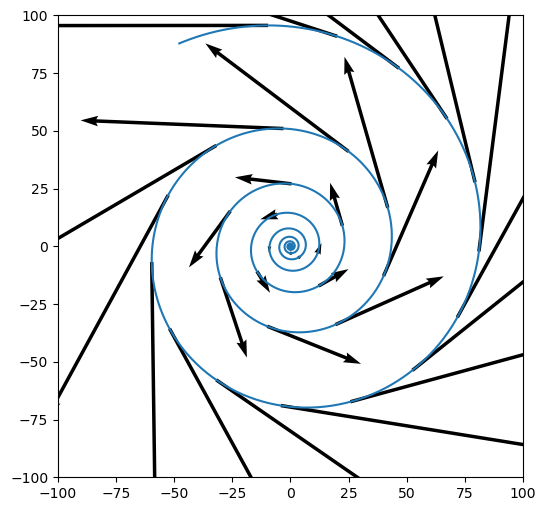

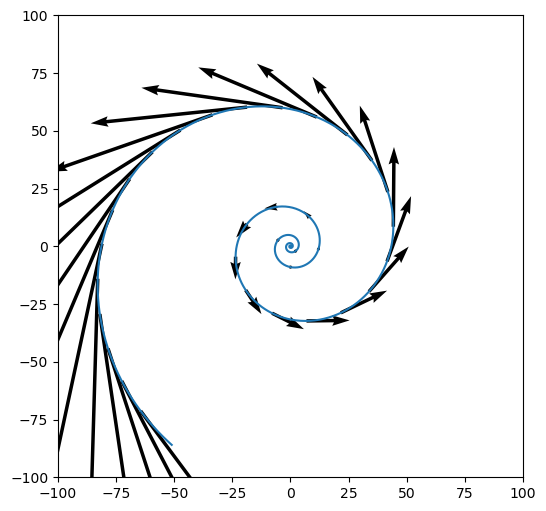

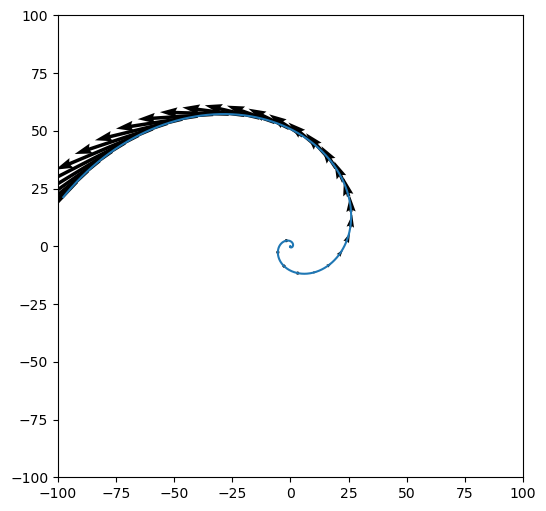

In [5]:
for case in range(2): 
    for j in range(len(a_vals)):
        a, b = a_vals[j], b_vals[j]
        theta = get_theta(r, a, b)
        
        if case == 0:
            vr = np.full(len(r), b)
            vtheta = np.full(len(r), a)
            scale_factor = 0.3
        else:
            vr = b * r**2
            vtheta = a * r**2
            scale_factor = 300
        
        x, y, vx, vy = get_cartesian(r, theta, vr, vtheta)
        x_i, y_i, vx_i, vy_i = get_cartesian(r[inds], theta[inds], vr[inds], vtheta[inds])
        
        plt.figure(figsize=(6,6))
        plt.axis([-100, 100, -100, 100])
        plt.plot(x, y)
        plt.quiver(x_i, y_i, vx_i, vy_i, scale_units='xy', scale=scale_factor)
        plt.show()

In [6]:
def lane_emden_derivs(coords, xi, n):
    theta, u = coords
    dtheta_dxi = 0 if xi == 0 else u/xi**2
    du_dxi = -xi**2 * theta**n
    return [dtheta_dxi, du_dxi]

In [8]:
# Setting up the grid and boundary conditions
nxis = 1000
xi = np.linspace(0, 10, num=nxis)
coords0 = [1., 0.]


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.3471206287013D+01   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.3884059640011D+01   r2 =                  NaN


/tmp/ipykernel_241787/3324317804.py:4: RuntimeWarning: invalid value encountered in scalar power
  du_dxi = -xi**2 * theta**n
/home/lordrick/miniconda3/envs/astr_257/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


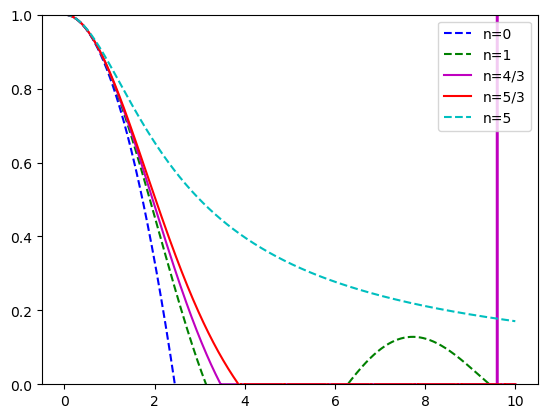

In [9]:
# Plotting solutions for various polytropic indices
fig, ax = plt.subplots()
for n, color, label in [(0., 'b--', 'n=0'), (1., 'g--', 'n=1'), 
			(4./3., 'm', 'n=4/3'), (5./3., 'r', 'n=5/3'), (5., 'c--', 'n=5')]:
    sol = odeint(lane_emden_derivs, coords0, xi, args=(n,))
    ax.plot(xi, sol[:, 0], color, label=label)

ax.set_ylim([0, 1])
ax.legend()
plt.show()

In [10]:
# Finding the outer edge and dimensionless mass for n=5/3
theta = sol[:, 0]
out_index = np.abs(theta).argmin()
xi_out = xi[out_index]
Mdimless = 4.0 * np.pi * np.trapz((theta * xi**2)[:out_index], xi[:out_index])

print(xi_out)
print(Mdimless)

10.0
1022.2239745659394
